### Домашнее задание "Корреляция и корреляционный анализ"

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?   
-Построить точечный график   
-Рассчитать коэффициенты корреляции Пирсона и Спирмена   
-Построить модель линейной регрессии   
-Рассчитать коэффициент детерминации   
-Вывести график остатков   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [4]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

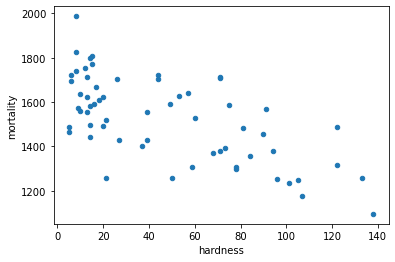

In [6]:
df.plot(kind='scatter', x='hardness', y='mortality')

Предположим, что есть обратная слабая линейная связь между  жесткостью воды и смертностью, т.е. чем вода жестче, тем смертность ниже

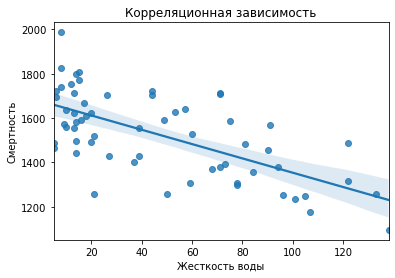

In [7]:
sns.regplot(x = df['hardness'], y = df['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

In [8]:
### коэффициент Пирсона

df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [9]:
### коэффициент Спирмена

df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [10]:
### коэффициент Кенделла

df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


Модель линейной регрессии

In [15]:
X = df[['hardness']]
y = df[['mortality']]

In [16]:
###    делим данные на 70% тренировочных и 30%  тестовых

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)   ### random_state=42 - случайное разбиение

In [17]:
### тренировочные

X_train.shape

(42, 1)

In [18]:
### тренировочные

y_train.shape

(42, 1)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [20]:
model.coef_   ### коэффициент при X

array([[-3.13167087]])

In [21]:
model.intercept_    ### свободный коэффициент 

array([1668.97229773])

In [22]:
y_pred = model.predict(X_test)       ### передаем тестовые значения Х и получаем y прогнозный 
y_pred

array([[1340.14685615],
       [1637.65558901],
       [1625.12890552],
       [1531.17877935],
       [1424.7019697 ],
       [1606.33888028],
       [1252.46007173],
       [1434.09698232],
       [1603.20720941],
       [1650.18227249],
       [1484.20371627],
       [1415.30695708],
       [1546.83713371],
       [1625.12890552],
       [1446.62366581],
       [1546.83713371],
       [1637.65558901],
       [1621.99723465],
       [1352.67353964]])

In [23]:
### сравниваем прогнозы с фактом

res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df.head(10)


,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


In [24]:
###  коэффициент детерминации

model.score(X_test, y_test) 

0.5046490611017092

Text(0, 0.5, 'Смертность')

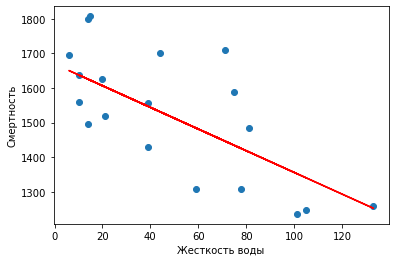

In [25]:
### визуализация факта и линия регрессии  

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')

Чем выше жесткость воды (большее содержание кальция), тем смертность ниже 

Альтернативный способ из statsmodel

In [26]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [29]:
X_const.shape

(42, 2)

In [30]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [31]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           7.83e-06
Time:                        02:01:05   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [32]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


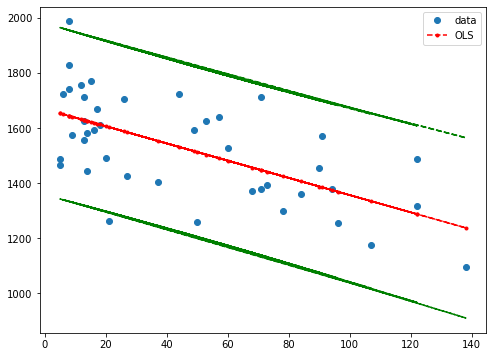

In [33]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

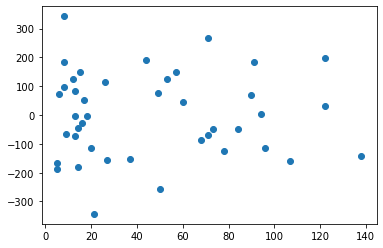

In [34]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [48]:
# разделяем данные, сначала исследуем южные районы
dfs = df.loc[df['location'] == 'South']
dfs

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

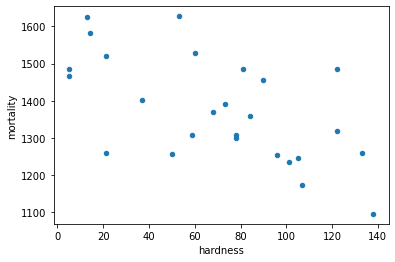

In [36]:
dfs.plot(kind='scatter', x='hardness', y='mortality')

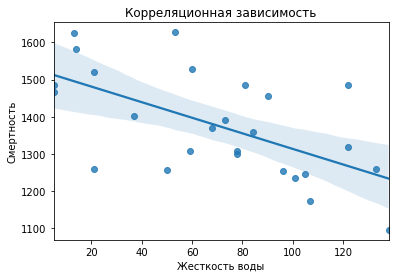

In [37]:
sns.regplot(x = dfs['hardness'], y = dfs['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

In [58]:
X = dfs[['hardness']]
y = dfs[['mortality']]

In [59]:
###    делим данные на 70% тренировочных и 30%  тестовых

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)   ### random_state=42 - случайное разбиение

In [60]:
### тренировочные

X_train.shape

(18, 1)

In [61]:
### тренировочные

y_train.shape

(18, 1)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [63]:
model.coef_   ### коэффициент при X

array([[-3.51342921]])

In [64]:
model.intercept_    ### свободный коэффициент 

array([1640.22046034])

In [65]:
y_pred = model.predict(X_test)       ### передаем тестовые значения Х и получаем y прогнозный 
y_pred

array([[1211.58209643],
       [1622.65331428],
       [1271.31039304],
       [1211.58209643],
       [1510.22357948],
       [1566.43844688],
       [1432.92813681],
       [1622.65331428]])

In [67]:
### сравниваем прогнозы с фактом

res_df = X_test.copy()
res_df




,hardness
18,122
38,5
0,105
58,122
27,37
19,21
33,59
2,5


In [68]:
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df.head(10)



,hardness,y_pred,y_test
18,122,1211.582096,1318
38,5,1622.653314,1486
0,105,1271.310393,1247
58,122,1211.582096,1486
27,37,1510.223579,1402
19,21,1566.438447,1260
33,59,1432.928137,1309
2,5,1622.653314,1466


In [69]:
###  коэффициент детерминации!!!!!!!!!!!! ?????????????????????????

model.score(X_test, y_test) 

-2.551922301235205

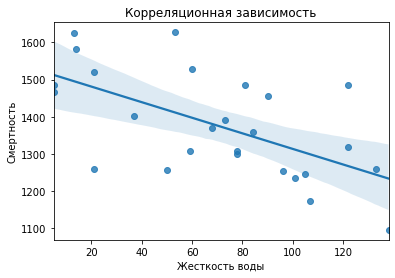

In [259]:
sns.regplot(x = South['hardness'], y = South['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

Предположим, что есть обратная слабая линейная связь между жесткостью воды и смертностью

In [260]:
### коэффициент Пирсона

South[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [261]:
### коэффициент Спирмена
South[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [262]:
### коэффициент Кенделла

South[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


Модель линейной регрессии

In [266]:
X_S = South[['hardness']]
y_s = South[['mortality']]

In [276]:
###    делим данные на 70% тренировочных и 30%  тестовых

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_S, y_s, test_size=0.30, random_state=42)   ### random_state=42 - случайное разбиение

In [277]:
### тренировочные

X_train_s.shape

(18, 1)

In [278]:
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [279]:
model_s.coef_   ### коэффициент при X

array([[-3.51342921]])

In [280]:
model_s.intercept_    ### свободный коэффициент 

array([1640.22046034])

In [281]:
y_pred_s = model_s.predict(X_test_s)       ### передаем тестовые значения Х и получаем y прогнозный 
y_pred_s

array([[1211.58209643],
       [1622.65331428],
       [1271.31039304],
       [1211.58209643],
       [1510.22357948],
       [1566.43844688],
       [1432.92813681],
       [1622.65331428]])

In [282]:
### сравниваем прогнозы с фактом

res_df_S = X_test_s.copy()

res_df_S['y_pred_s'] = y_pred_s
res_df_S['y_test_s'] = y_test_s
res_df_S.head(10)

,hardness,y_pred_s,y_test_s
18,122,1211.582096,1318
38,5,1622.653314,1486
0,105,1271.310393,1247
58,122,1211.582096,1486
27,37,1510.223579,1402
19,21,1566.438447,1260
33,59,1432.928137,1309
2,5,1622.653314,1466


In [283]:
###  коэффициент детерминации

model_s.score(X_test_s, y_test_s) 

-2.551922301235205

Text(0, 0.5, 'Смертность')

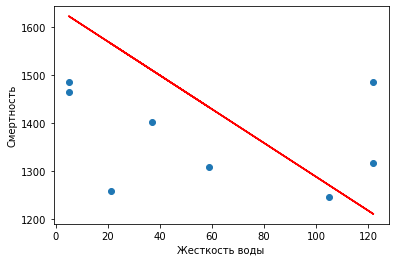

In [220]:
### визуализация факта и линия регрессии  

plt.scatter(X_test_s, y_test_s)
plt.plot(X_test_s, y_pred_s, c='r')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')

Альтернативный способ

In [221]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [230]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_S, y_s, test_size=0.30, random_state=20)

In [231]:
X_const_s = sm.add_constant(X_train_s) # техническая особенность библиотек, надо руками добавить константу

In [232]:
X_const_s.shape

(18, 2)

In [233]:
model_s = sm.OLS(y_train_s, X_const_s)
results_s = model_s.fit()
print(results_s.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     11.24
Date:                Mon, 12 Jul 2021   Prob (F-statistic):            0.00405
Time:                        01:40:53   Log-Likelihood:                -108.56
No. Observations:                  18   AIC:                             221.1
Df Residuals:                      16   BIC:                             222.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1494.7028     55.255     27.051      0.0

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


ValueError: x and y must have same first dimension, but have shapes (18,) and (42,)

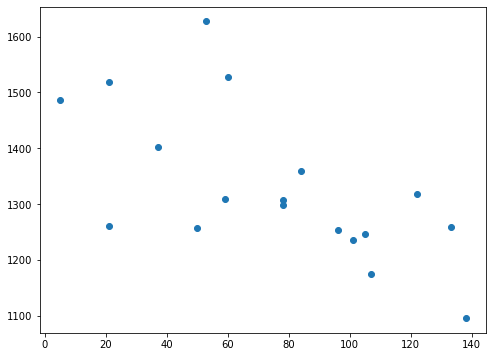

In [234]:
prstd, iv_l, iv_u = wls_prediction_std(results_s) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const_s.iloc[:, 1], y_train_s, 'o', label="data")
ax.plot(X_const_s.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const_s.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const_s.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

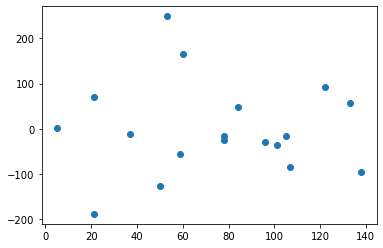

In [235]:
# посмотрим на остатки
plt.scatter(X_const_s.iloc[:, 1], results_s.resid)

In [236]:
# разделяем данные, теперь исследуем  северные районы
df_N = df.loc[df['location'] == 'North']
df_N.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


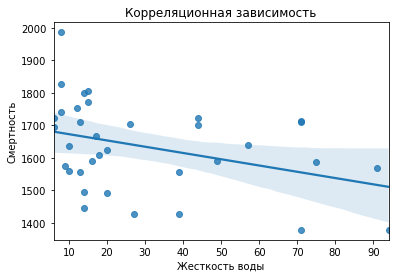

In [237]:
sns.regplot(x = df_N['hardness'], y = df_N['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

In [238]:
### коэффициент Пирсона

df_N[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [239]:
### коэффициент Спирмена

df_N[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [240]:
### коэффициент Кенделла

df_N[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [241]:
X = df_N[['hardness']]
y = df_N['mortality']

In [242]:
###    делим данные на 70% тренировочных и 30%  тестовых

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)   ### random_state=42 - случайное разбиение

In [243]:
### тренировочные

X_train.shape

(24, 1)

In [244]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [245]:
model.coef_   ### коэффициент при X

array([-1.97686226])

In [246]:
model.intercept_    ### свободный коэффициент 

1688.150229031281

In [247]:
y_pred = model.predict(X_test)       ### передаем тестовые значения Х и получаем y прогнозный 
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [248]:
### сравниваем прогнозы с фактом

res_df_N = X_test.copy()

res_df_N['y_pred'] = y_pred
res_df_N['y_test'] = y_test
res_df_N.head(10)

,hardness,y_pred,y_test
45,8,1672.335331,1987
23,9,1670.358469,1574
43,14,1660.474157,1444
36,6,1676.289055,1724
26,16,1656.520433,1591
50,71,1547.793009,1713
31,44,1601.168290,1702
22,8,1672.335331,1742
16,39,1611.052601,1555
28,15,1658.497295,1772


In [249]:
###  коэффициент детерминации

model.score(X_test, y_test) 

0.018885304285745863

Text(0, 0.5, 'Смертность')

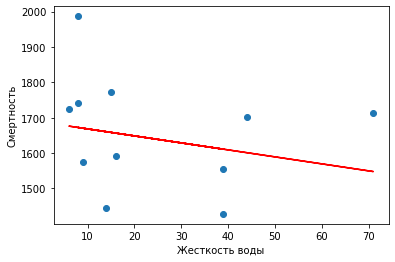

In [250]:
### визуализация факта и линия регрессии  

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')

Альтернативный способ

In [251]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [253]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [254]:
X_const.shape

(24, 2)

In [255]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Mon, 12 Jul 2021   Prob (F-statistic):             0.0316
Time:                        01:44:14   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

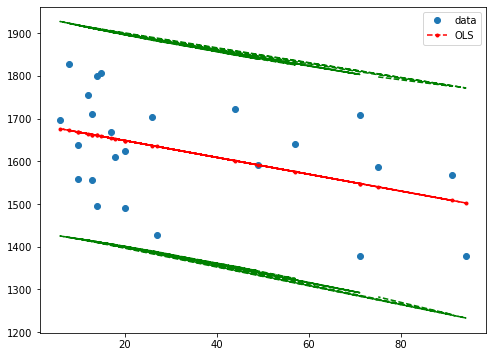

In [256]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

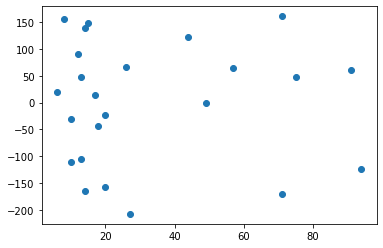

In [257]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)